# Data preparation

In [ ]:
# The world-happiness-report-2017 dataset contains the following variables:

# Country - the name of the country (object/string)
# Happiness.Rank - the happiness rank of the country (int)
# Happiness.Score - the happiness score of the country (float)
# Whisker.high - the maximum value of the degree of happiness of a given country (excluding outliers) (float)
# Whisker.low - the minimum value of the degree of happiness of a given country (excluding outliers) (float) 
# Economy.GDP.per.Capita - GDP per capita (float)
# Family - the average number of family members (float)
# Health.Life.Expectancy (float)
# Freedom (float)
# Generosity (float)
# Trust.Government.Corruption - trust in the government and the absence of corruption (float)
# Dystopia.Residual - the difference between the degree of happiness of a given country and the degree of happiness of a dystopian country (float)

# The main objective is to identify clusters using K-Means, visualize, and interpret
# the clusters regarding the internal measures, and mean values of the attributes.
# You should use a subset of the data that contains only data for countries that
# have a value of the Economy.GDP.per.Capita greater than 0.

In [ ]:
#@title Data load
# Load a csv file
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/sdimitrijevic/ai-ml/main/datasets/world-happiness-report-2017.csv'
df = pd.read_csv(url)

# from a file
# df = pd.read_csv("datasets\world-happiness-report-2017.csv")

df.shape

(155, 12)

In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [ ]:
# Renaming some columns to remove redundant dots
df.rename(columns = {'Economy..GDP.per.Capita.':'Economy.GDP.per.Capita', 
                     'Health..Life.Expectancy.':'Health.Life.Expectancy',
                     'Trust..Government.Corruption.':'Trust.Government.Corruption'}, inplace = True)

In [ ]:
#@title Checking data
# First 5 rows
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy.GDP.per.Capita,Family,Health.Life.Expectancy,Freedom,Generosity,Trust.Government.Corruption,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
# Last 5 rows
df.tail()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy.GDP.per.Capita,Family,Health.Life.Expectancy,Freedom,Generosity,Trust.Government.Corruption,Dystopia.Residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [ ]:
# the statistical summary of numerical variables
df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy.GDP.per.Capita,Family,Health.Life.Expectancy,Freedom,Generosity,Trust.Government.Corruption,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [ ]:
# Removing rows where Economy.GDP.per.Capita is 0
df = df[(df['Economy.GDP.per.Capita'] > 0)]

In [ ]:
# Checking the number of the rows (1 row was removed)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      154 non-null    object 
 1   Happiness.Rank               154 non-null    int64  
 2   Happiness.Score              154 non-null    float64
 3   Whisker.high                 154 non-null    float64
 4   Whisker.low                  154 non-null    float64
 5   Economy.GDP.per.Capita       154 non-null    float64
 6   Family                       154 non-null    float64
 7   Health.Life.Expectancy       154 non-null    float64
 8   Freedom                      154 non-null    float64
 9   Generosity                   154 non-null    float64
 10  Trust.Government.Corruption  154 non-null    float64
 11  Dystopia.Residual            154 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 15.6+ KB


In [ ]:
# It is recommended to give a category to each country as Low, Mid and High, according to their happiness scores
# to explore prospective patterns in the dataset.
# Thus we have to find out the bound in which these categories shall lie in.

print('max:',df['Happiness.Score'].max())
print('min:',df['Happiness.Score'].min())
add=df['Happiness.Score'].max()-df['Happiness.Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.53700017929077
min: 2.90499997138977
range difference: 1.544


In [ ]:
# Finding the bounds
upper_low=df['Happiness.Score'].min()+grp
upper_mid=upper_low+grp

print('upper bound of Low grp',upper_low)
print('upper bound of Mid grp',upper_mid)
print('upper bound of High grp','max:',df['Happiness.Score'].max())

upper bound of Low grp 4.44899997138977
upper bound of Mid grp 5.99299997138977
upper bound of High grp max: 7.53700017929077


In [ ]:
# Creating a new variable Category based on the low, mid and high hapiness score
choices = ['Low','Mid','High']
conditions = [((df['Happiness.Score'] > 0) & (df['Happiness.Score'] <= upper_low)),
               ((df['Happiness.Score'] > upper_low) & (df['Happiness.Score'] <= upper_mid)),
               (df['Happiness.Score'] > upper_mid)]

df['Category'] = np.select(conditions, choices)

In [ ]:
# Checking the number of data items in each category
df.value_counts("Category")

Category
Mid     74
High    45
Low     35
dtype: int64

In [ ]:
# Checking min, max, std and mean for each category
df1 = df.drop(['Country'], axis=1)
df1.groupby('Category').agg(["min","max","std","mean"])

Happiness.Rank                        Happiness.Score         \
                    min  max        std   mean             min    max   
Category                                                                
High                  1   45  13.133926   23.0           6.003  7.537   
Low                 120  154  10.246951  137.0           2.905  4.440   
Mid                  46  119  21.505813   82.5           4.460  5.973   

                             Whisker.high            ... Generosity            \
               std      mean          min       max  ...        std      mean   
Category                                             ...                        
High      0.475751  6.719089     6.105848  7.622030  ...   0.133089  0.297080   
Low       0.356063  3.887657     3.074690  4.553447  ...   0.108451  0.240066   
Mid       0.466116  5.253419     4.542729  6.197242  ...   0.140697  0.219123   

         Trust.Government.Corruption                                \
                                 min       max       std      mean   
Category                                                             
High                        0.008965  0.464308  0.128431  0.198489   
Low                         0.023029  0.455220  0.075591  0.098642   
Mid                         0.000000  0.293934  0.064974  0.089764   

         Dystopia.Residual                                
                       min       max       std      mean  
Category                                                  
High              1.145464  2.898639  0.410541  2.168159  
Low               0.377914  2.224959  0.473511  1.514545  
Mid               0.554633  3.117485  0.450605  1.812765  

[3 rows x 44 columns]

In [ ]:
# Checking if the dataset has missing values
df.isnull().sum()

Country                        0
Happiness.Rank                 0
Happiness.Score                0
Whisker.high                   0
Whisker.low                    0
Economy.GDP.per.Capita         0
Family                         0
Health.Life.Expectancy         0
Freedom                        0
Generosity                     0
Trust.Government.Corruption    0
Dystopia.Residual              0
Category                       0
dtype: int64

In [ ]:
df.isna().sum()

Country                        0
Happiness.Rank                 0
Happiness.Score                0
Whisker.high                   0
Whisker.low                    0
Economy.GDP.per.Capita         0
Family                         0
Health.Life.Expectancy         0
Freedom                        0
Generosity                     0
Trust.Government.Corruption    0
Dystopia.Residual              0
Category                       0
dtype: int64

In [ ]:
# After checking sum of nulls or Nas, and the visual inspection of the dataset, 
# it can be concluded that there is no missing values in the dataset.
# Otherwise, we should apply some of the methods for addressing missing values.

In [ ]:
# Number of Unique values in each column
df.nunique()

Country                        154
Happiness.Rank                 154
Happiness.Score                150
Whisker.high                   154
Whisker.low                    154
Economy.GDP.per.Capita         154
Family                         154
Health.Life.Expectancy         154
Freedom                        154
Generosity                     154
Trust.Government.Corruption    154
Dystopia.Residual              154
Category                         3
dtype: int64

<ipython-input-17-766c015f430d>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


<Axes: >

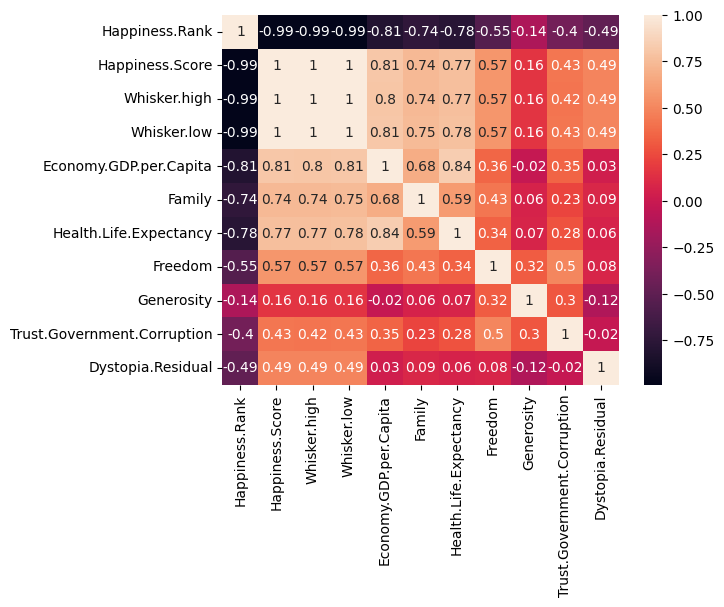

In [ ]:
#@title Data visualization

# Visualizing correlation matrics

# We need to check if some of the variable are highly correlated. The use of highly	
# correlated variables can negatively affect cluster analysis so that patterns detected in the data	
# may not be the true ones.	Therefore, we will first compute and plot correlations for all variable pairs.	

correlation_matrix = df.corr().round(2)

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, and Health.Life.Expectancy
# are highly correlated with some of the variables. So, they will not be used for clustering.
df = df.drop(['Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy.GDP.per.Capita'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      154 non-null    object 
 1   Family                       154 non-null    float64
 2   Health.Life.Expectancy       154 non-null    float64
 3   Freedom                      154 non-null    float64
 4   Generosity                   154 non-null    float64
 5   Trust.Government.Corruption  154 non-null    float64
 6   Dystopia.Residual            154 non-null    float64
 7   Category                     154 non-null    object 
dtypes: float64(6), object(2)
memory usage: 10.8+ KB


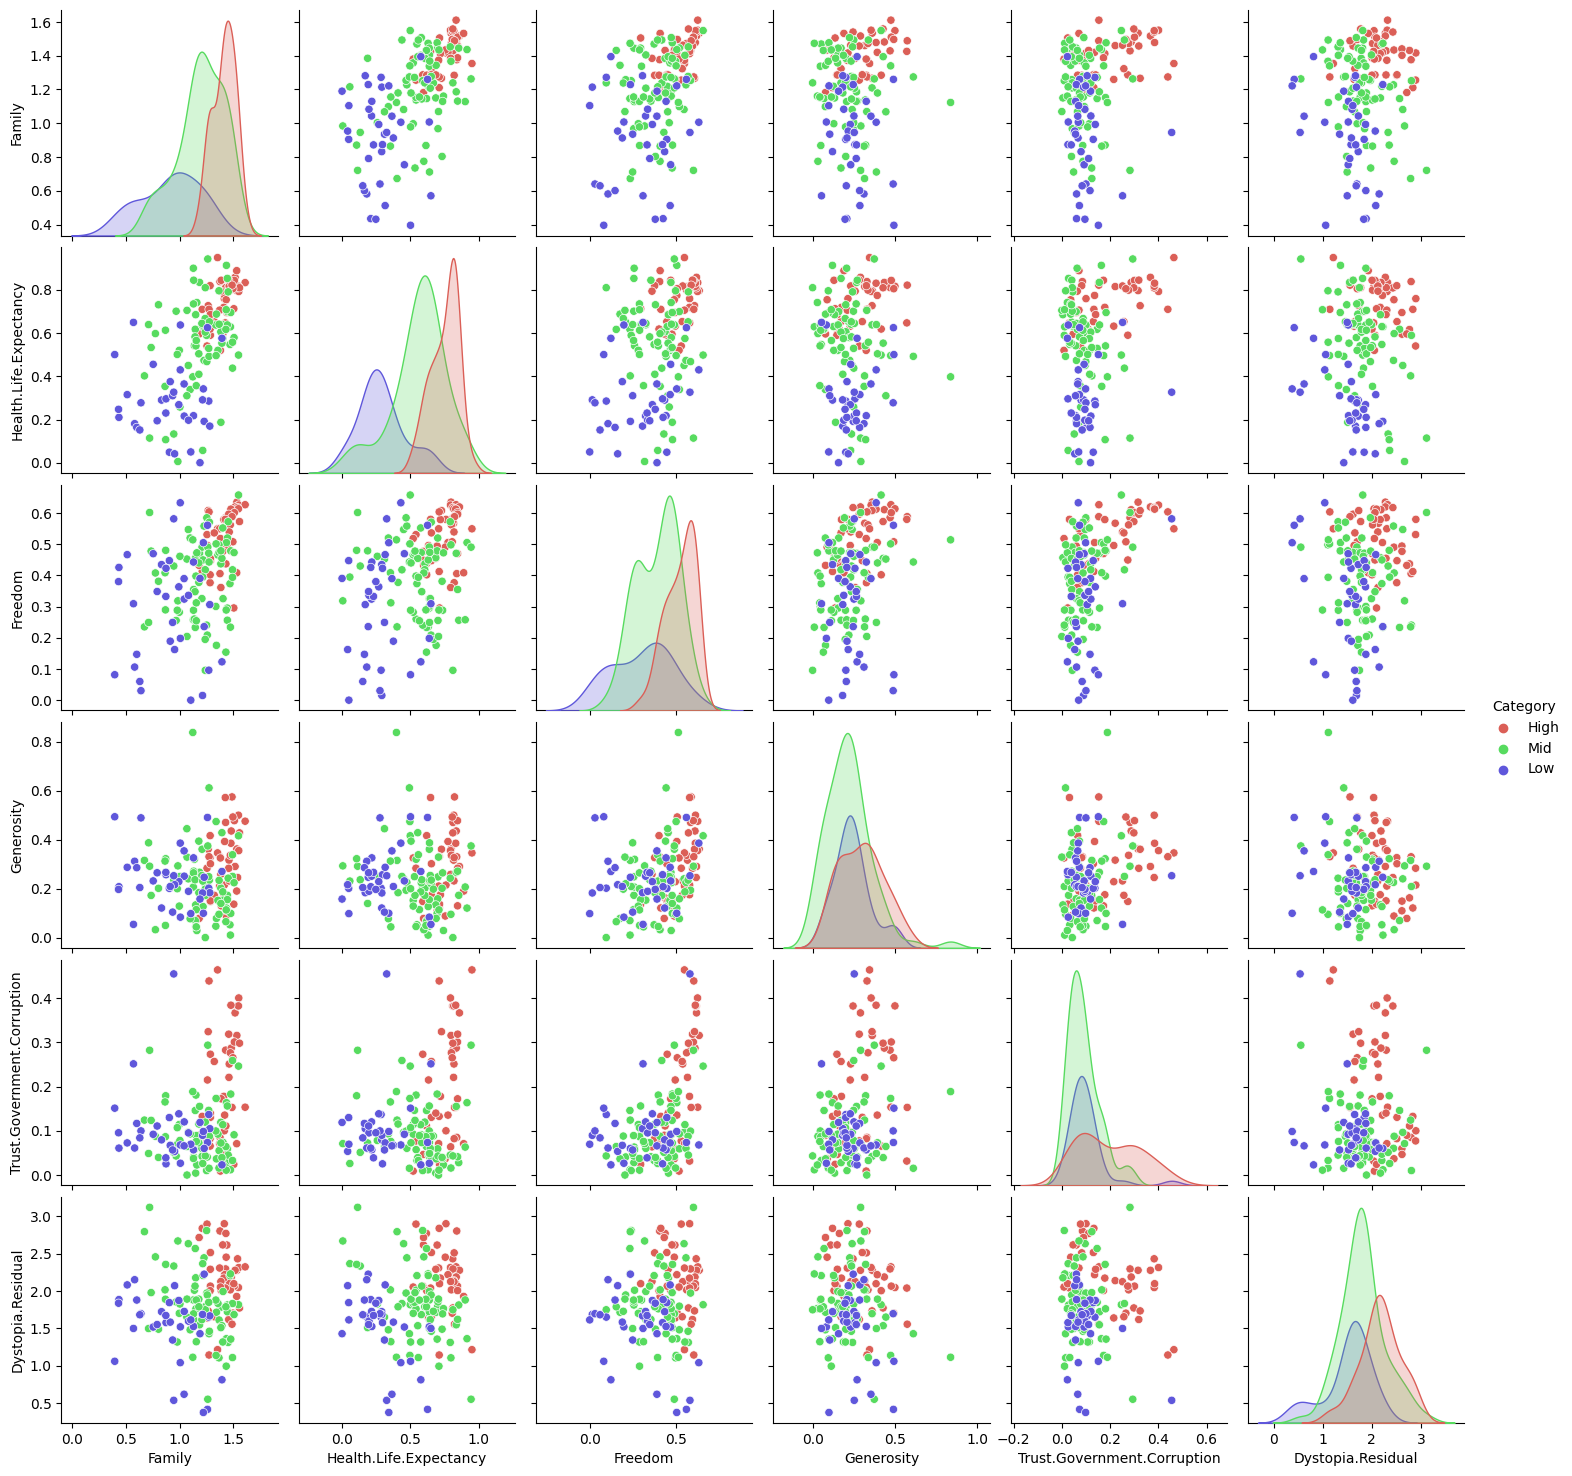

In [ ]:
# Visualizing outliers
sns.pairplot(data = df, hue="Category", palette="hls");

In [ ]:
# Boxplot to look at outliers and overall spread

# Function to make boxplots
def boxplt(x,y,r=45):
    fig, ax = plt.subplots(figsize=(7,4))
    box = sns.boxplot(x=x,y=y, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=90)
    fig.subplots_adjust(bottom=0.4)
    plt.tight_layout()

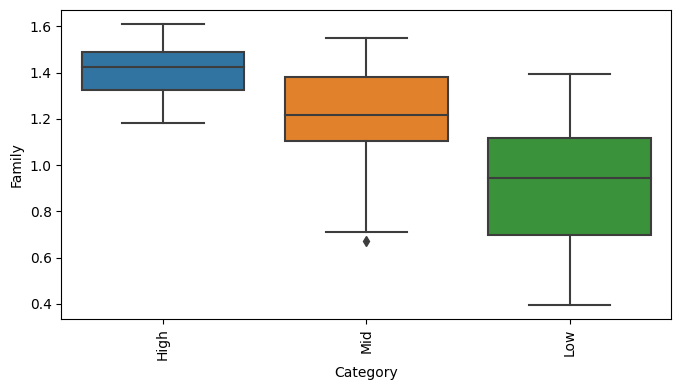

In [ ]:
# Boxplots based on Category and Family
boxplt("Category","Family")

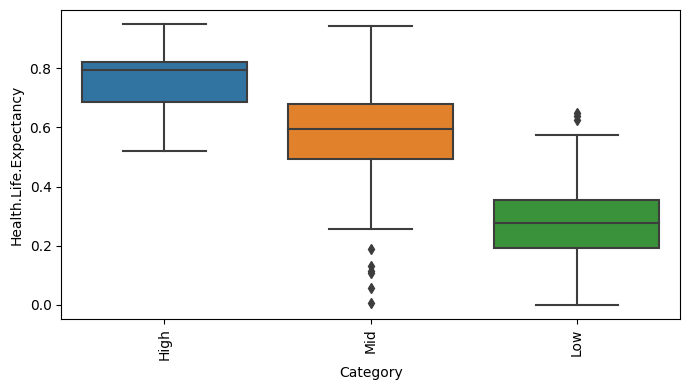

In [ ]:
# Boxplots Based on Category and Health.Life.Expectancy
boxplt("Category","Health.Life.Expectancy")

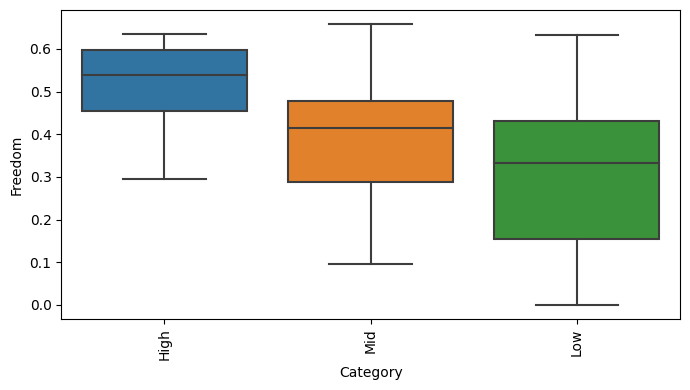

In [ ]:
# Boxplots Based on Category and Freedom
boxplt("Category","Freedom")

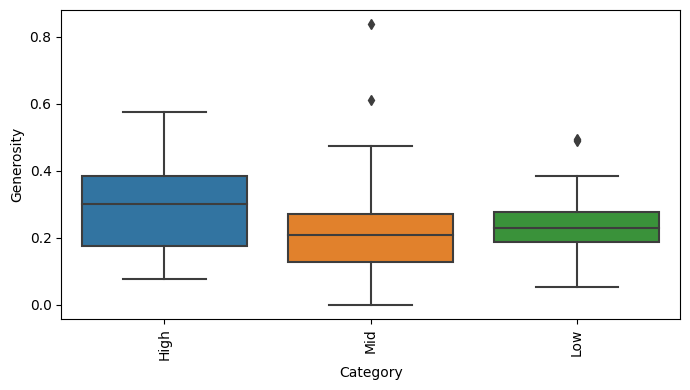

In [ ]:
# Boxplots Based on Category and Generosity
boxplt("Category","Generosity")

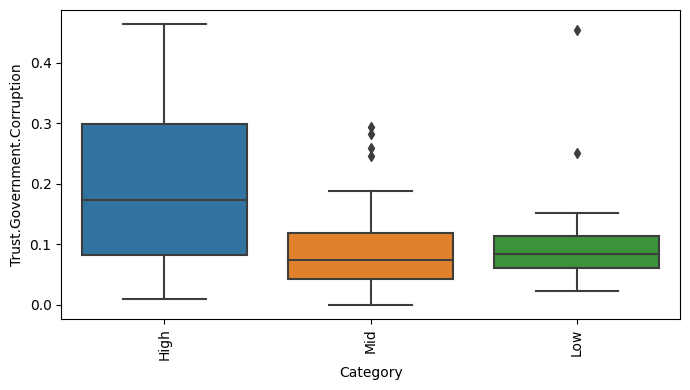

In [ ]:
# Boxplots Based on Category and Trust.Government.Corruption
boxplt("Category","Trust.Government.Corruption")

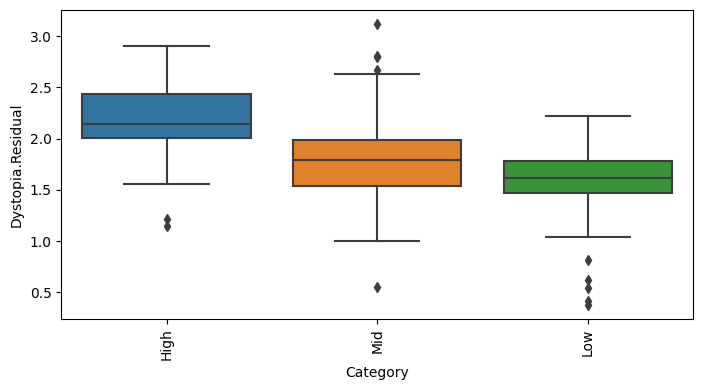

In [ ]:
# Boxplots Based on Category and Dystopia.Residual 
boxplt("Category","Dystopia.Residual")

In [ ]:
# We could see that there are some outliers. Although, there are differences in data spread 
# among the categories, they are acceptable.

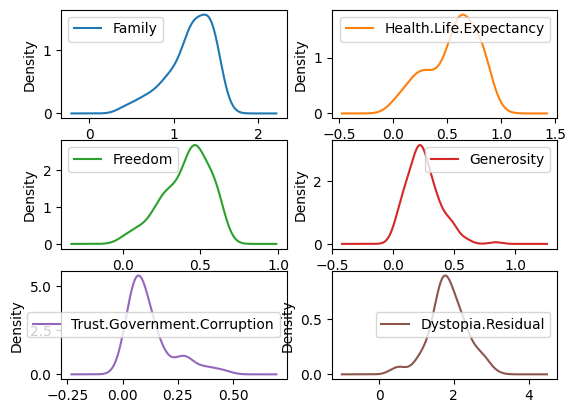

In [ ]:
# Checking density plots
# Univariate Plots (Density Plots)
from matplotlib import pyplot

df.plot(kind='density', subplots=True, layout=(3,2), sharex=False)
pyplot.show()

In [ ]:
#@title Checking normality
# If numeric variables follow normal distribution can be checked for instance using visual inspection
# or a normality test such as shapiro test (good for small sample sizes, e.g. n < ~2000)

from scipy.stats import shapiro

# Numerical variables/features
features = ["Family", "Health.Life.Expectancy", "Freedom", "Generosity", 'Trust.Government.Corruption', 'Dystopia.Residual']

# Checking if numeric variables follow normal distribution
for i in features:    
    print(i)
    # normality test
    stat, p = shapiro(df[i])
    print('\n(W)= %e,\n p = %e' % ( stat, p ))     

    if p > 0.05:        
        print('\nSample looks Gaussian\n')
    else:        
        print('\nSample does not look Gaussian\n')

Family

(W)= 9.246479e-01,
 p = 3.180271e-07

Sample does not look Gaussian

Health.Life.Expectancy

(W)= 9.475515e-01,
 p = 1.609715e-05

Sample does not look Gaussian

Freedom

(W)= 9.581926e-01,
 p = 1.349584e-04

Sample does not look Gaussian

Generosity

(W)= 9.574181e-01,
 p = 1.146891e-04

Sample does not look Gaussian

Trust.Government.Corruption

(W)= 8.406482e-01,
 p = 1.193365e-11

Sample does not look Gaussian

Dystopia.Residual

(W)= 9.813260e-01,
 p = 3.491951e-02

Sample does not look Gaussian



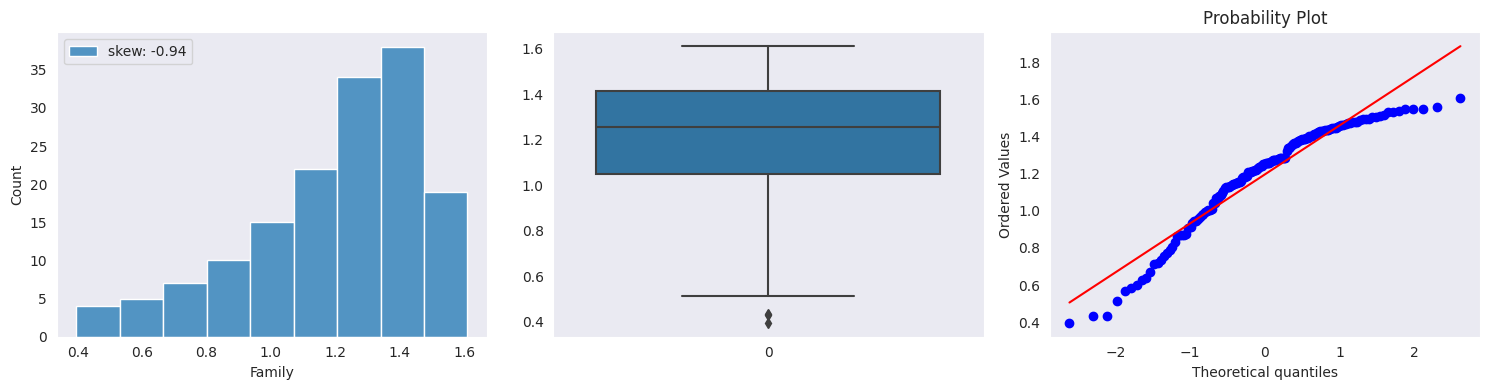

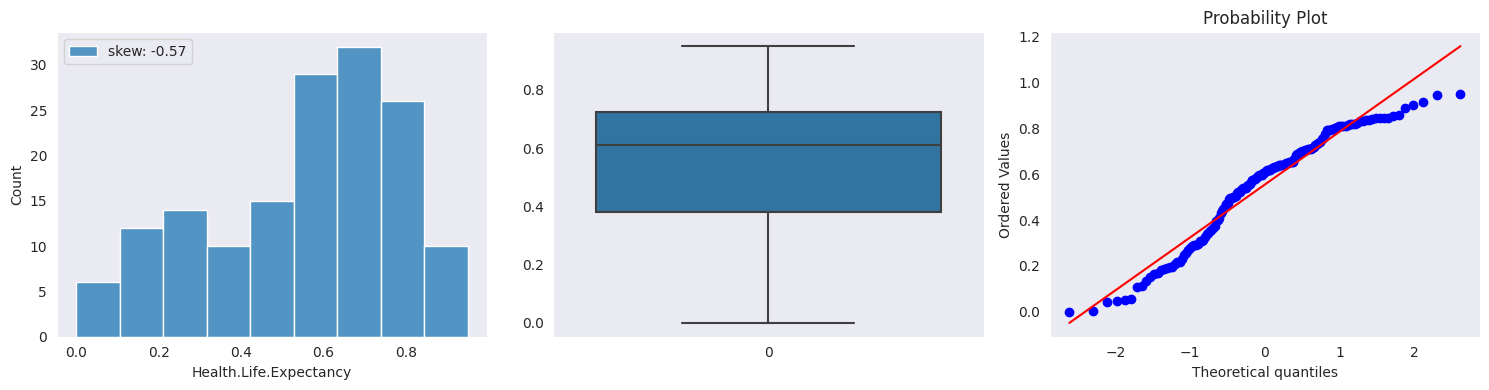

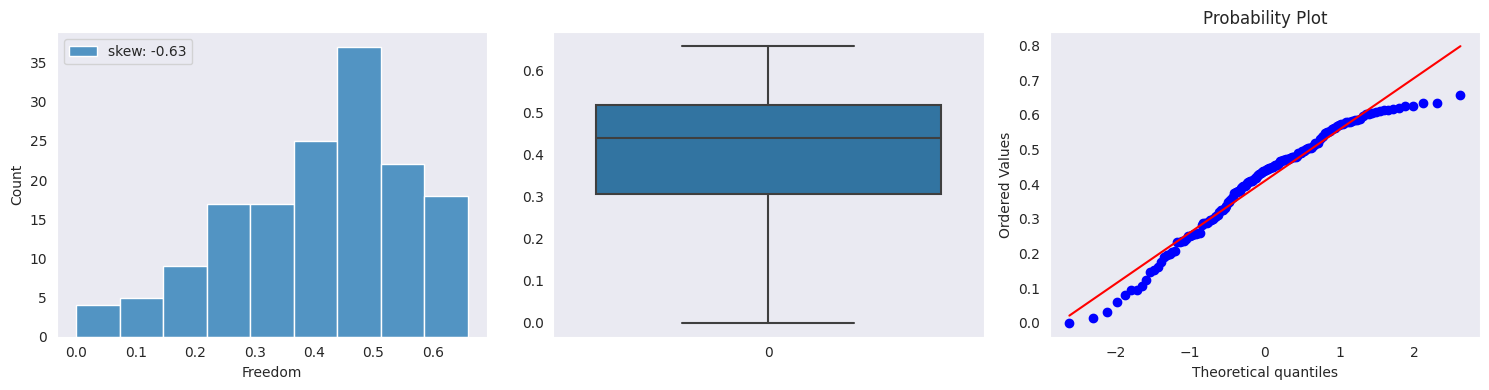

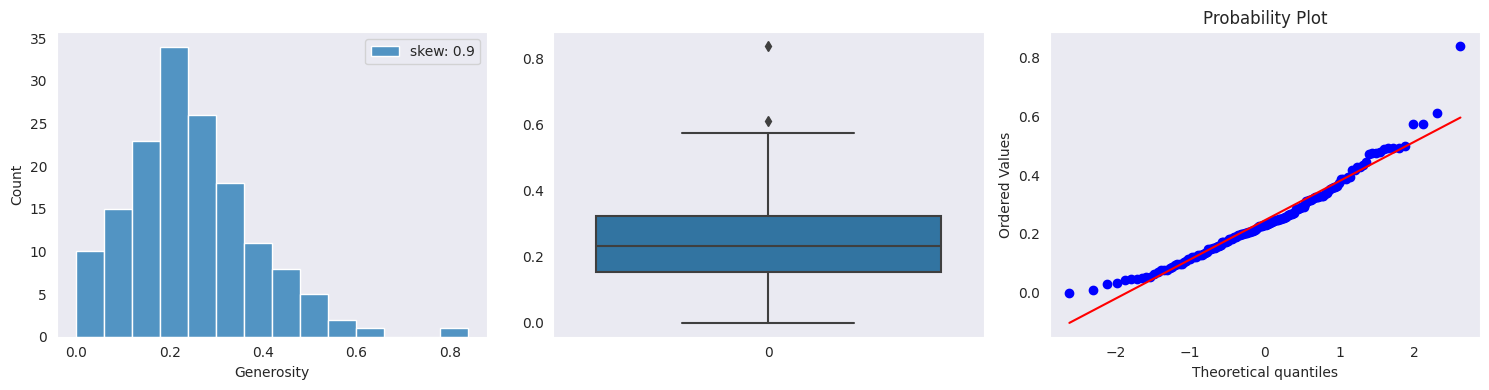

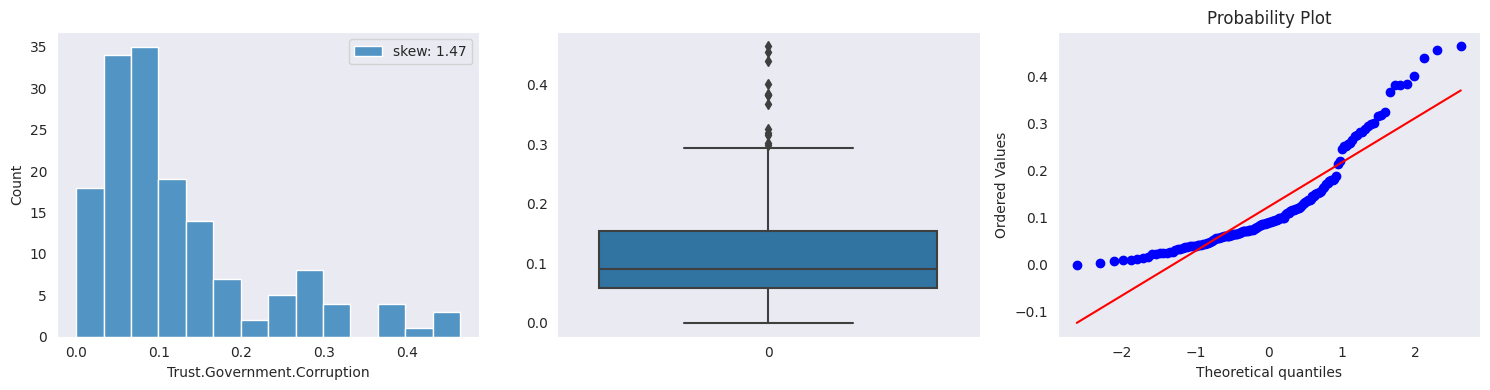

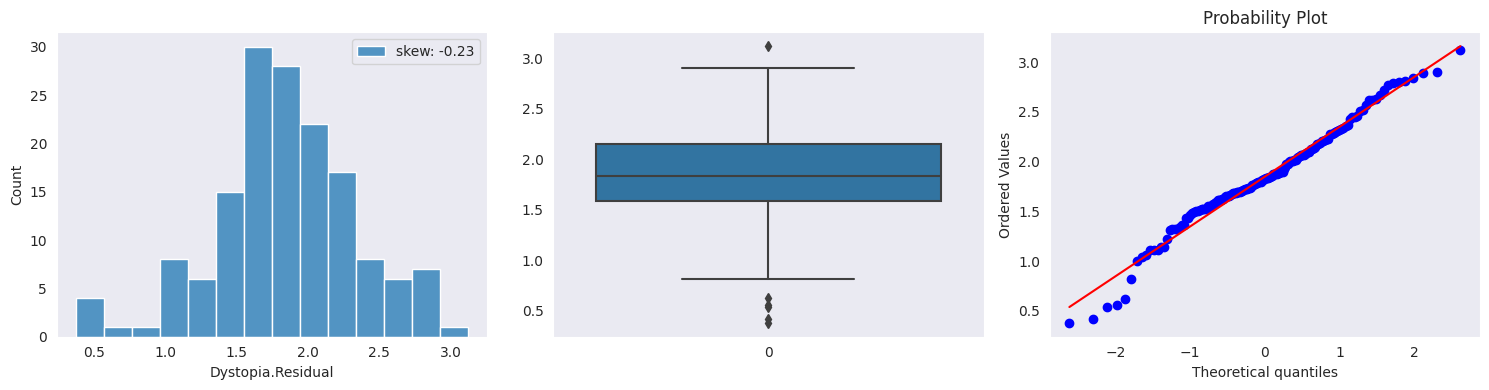

In [ ]:
# Checking normality and outliers
from scipy import stats

sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [ ]:
# Addressing outliers before using Standard Scaler

# Capping using Percentile technique (Winsorization technique)
# It replaces the extreme values with a specific percentile of data, typically
# 95% for overly high values and 5th percentile for overly low values.

def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        
#         lower_bound = df[col].quantile(from_low_end)
#         upper_bound = df[col].quantile(1-from_high_end)
        
#         df[col] = np.where(df[col]>upper_bound, upper_bound,
#                  np.where(df[col]<lower_bound, lower_bound, df[col]))

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [ ]:
# Outliers will be addressed with percentile_capping in the features Generosity and Dystopia.Residual.
# For Trust.Government.Corruption, log scaling  will be used first to address considerable skewness.

# # Log scaling computes the log of the values to compress a wide range to a narrow range.
# In other words, it helps convert a skewed distribution to a normal distribution/less-skewed distribution. 

# Logarithmic transformation (positive values only; for negative values, a constant can be added before log transformation)
# For negative values
  ## a constant can be added before log transformation
  ## cube root transformation

# Unskewing data with log transformation (if there are zeros, a constant (+1)) can be added)
df['Trust.Government.Corruption'] = np.log(df['Trust.Government.Corruption']+1)

In [ ]:
#  Calling the percentile_capping function

# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
percentile_capping(df, ['Generosity','Dystopia.Residual'], 0, 0.05)
percentile_capping(df, ['Trust.Government.Corruption'], 0.05, 0.05)
percentile_capping(df, ['Family'], 0.05, 0)

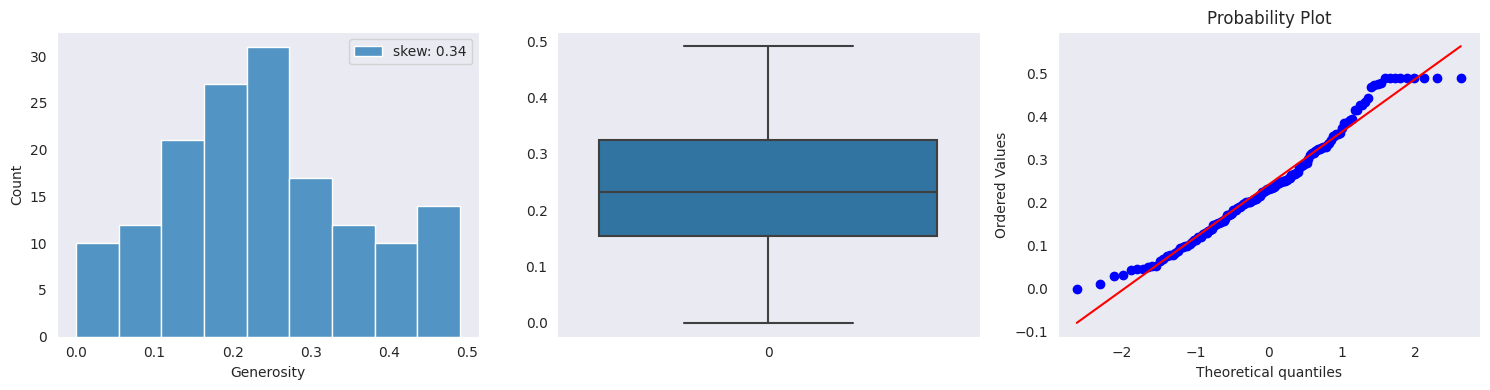

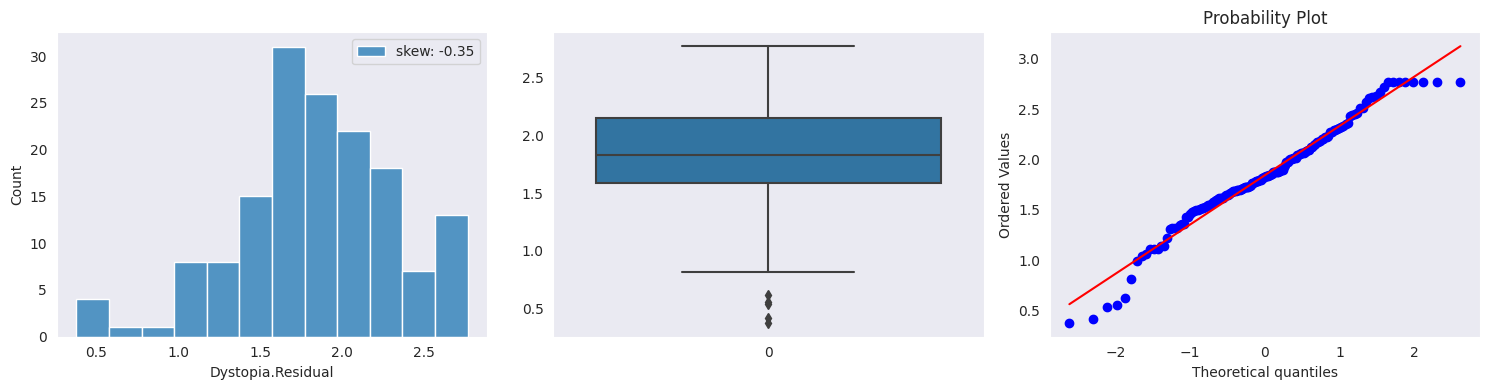

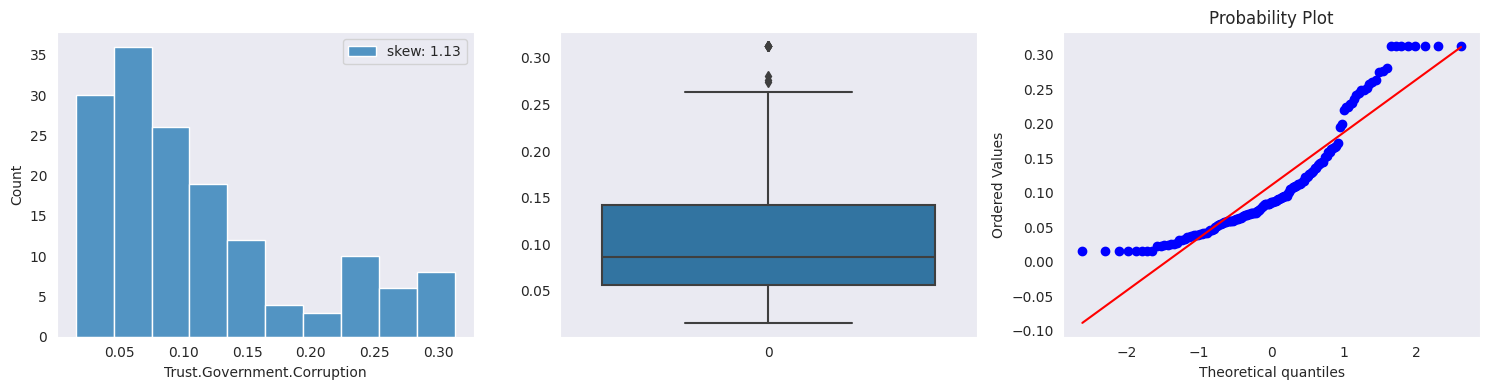

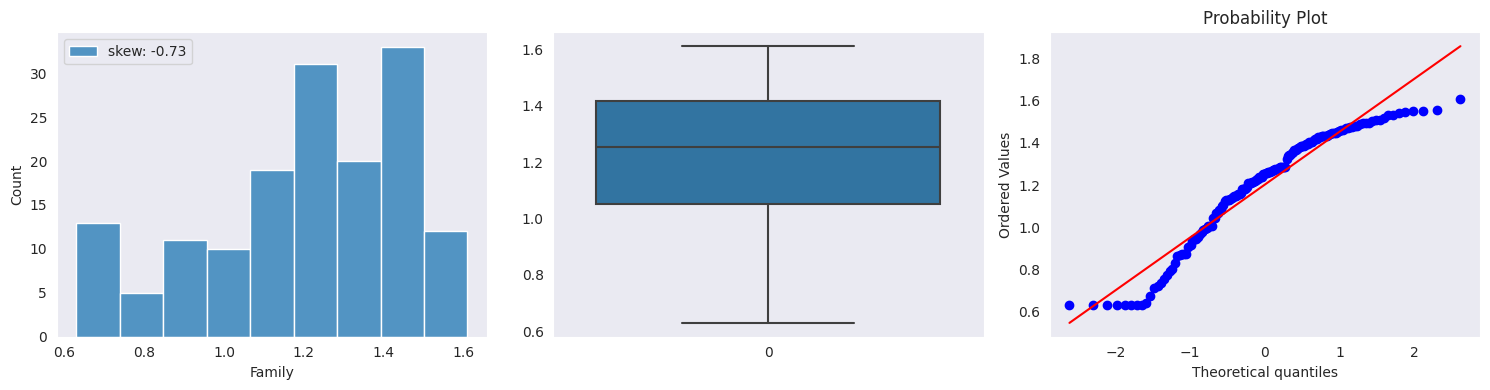

In [ ]:
# Checking again outliers after percentile capping
sns.set_style('dark')
for col in ['Generosity','Dystopia.Residual','Trust.Government.Corruption','Family']:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [ ]:
# Calling the percentile_capping function again for the variables where there
# are still outliers.

percentile_capping(df, ['Generosity','Dystopia.Residual'], 0.05, 0)
percentile_capping(df, ['Trust.Government.Corruption'], 0, 0.05)

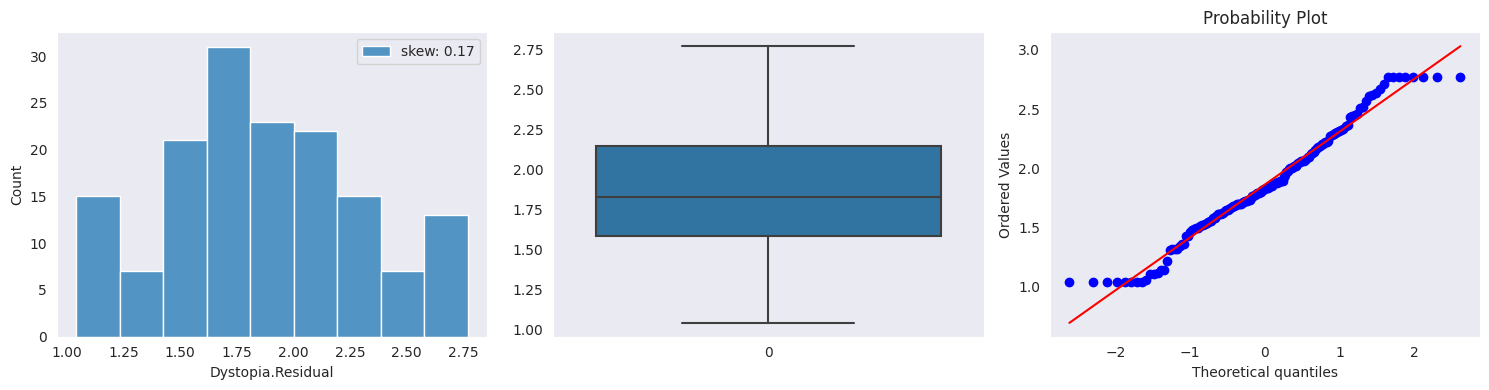

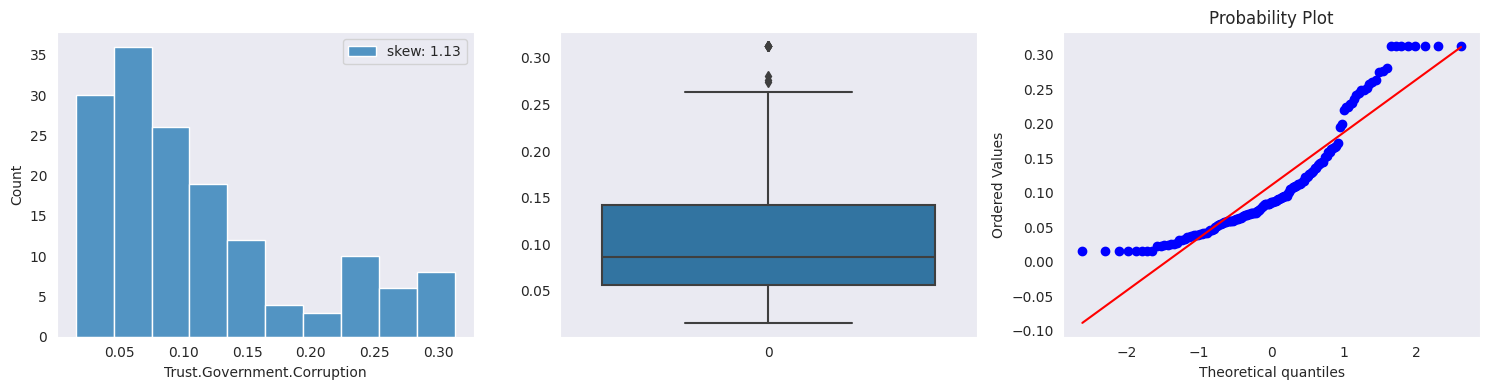

In [ ]:
# Checking again outliers after percentile capping
sns.set_style('dark')
for col in ['Dystopia.Residual','Trust.Government.Corruption']:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [ ]:
# Calling the percentile_capping function again for the remaining variables with
# some outliers.

percentile_capping(df, ['Trust.Government.Corruption'], 0, 0.1)

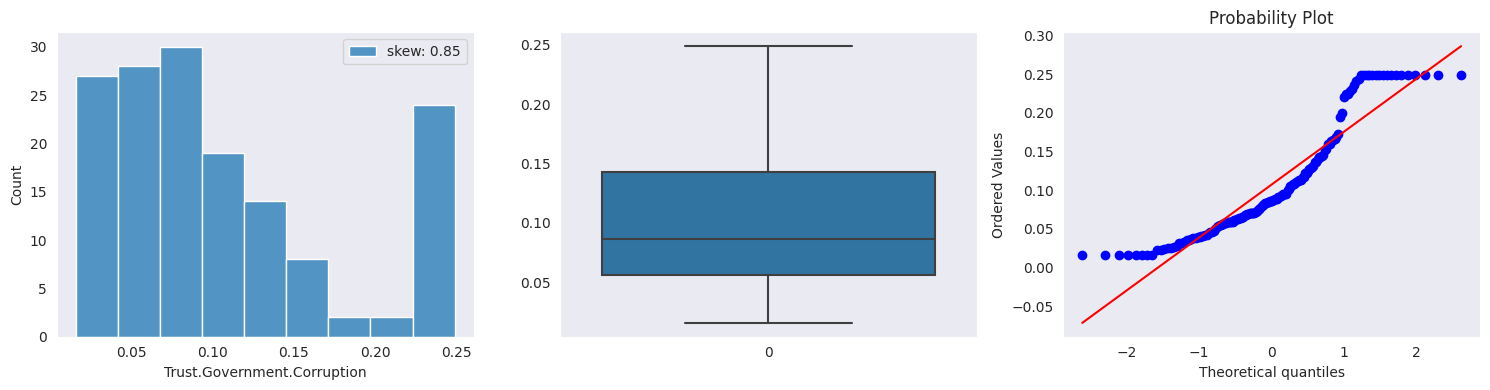

In [ ]:
# Checking again outliers after percentile capping
sns.set_style('dark')
for col in ['Trust.Government.Corruption']:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [ ]:
df.describe()

,Family,Health.Life.Expectancy,Freedom,Generosity,Trust.Government.Corruption,Dystopia.Residual
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1.202327,0.554799,0.409682,0.243376,0.107331,1.863204
std,0.257333,0.233891,0.150070,0.121791,0.072020,0.446515
min,0.629794,0.000000,0.000000,0.049693,0.015745,1.042941
25%,1.049448,0.380798,0.307313,0.153590,0.056315,1.587952
50%,1.254751,0.609627,0.438880,0.231521,0.086099,1.829808
75%,1.415360,0.724903,0.517596,0.324529,0.142724,2.147727
max,1.610574,0.949492,0.658249,0.490864,0.248937,2.769267


In [ ]:
#@title Rescaling data

# When	variables	are	in	incomparable	units	and/or	the	numeric	values	are	on	very different	
# scales	of	magnitude,	they	should	be	rescaled.

# (1) Normalization	can be used when there are no outliers.
# Normalization - reducing variable values to a common value range, typically [0,1]; this is often done using the formula:
# Z = (X - min(X))/(max(X) - min(X))
# sklearn.preprocessing.normalize

# (2) Standardization - rescaling variables so that their mean = 0 and SD = 1. For the variable X that is
# normally distributed, this is done by computing:
# Z = (X - mean(X))/SD(X)
# sklearn.preprocessing.StandardScaler

# Normalization is a special case of min-max scaling (sklearn.preprocessing MinMaxScaler). 
# Normalization should be avoided if (numerical) variables have outliers.
# Standardization is less affected by the presence of outliers. However, the outliers
# have an influence when computing the empirical mean and standard deviation. 
# In the absence of outliers, either of the two can be used.

# Standardization can be helpful in cases where data follow a Gaussian distribution.
# However, this doesn’t necessarily have to be true. In addition, unlike normalization, standardization doesn’t have a bounding range.

# (3) If the variable X is not normally distributed, standardization is typically done using median and interquartile range (IQR)
# Z = (X - meadian(X))/IQR(X)
# where IQR(X) = Q3(X) − Q1(X)
# sklearn.preprocessing.RobustScaler

# (4) Log scaling computes the log of the values to compress a wide range to a narrow range.
# In other words, it helps convert a skewed distribution to a normal distribution/less-skewed distribution. 

from sklearn.preprocessing import normalize

# Numerical variables/features
features = ["Family", "Health.Life.Expectancy", "Freedom", "Generosity", 'Trust.Government.Corruption', 'Dystopia.Residual']

x = df[features]


# to ensure x1 is a dataframe
x1 = x.copy()
x1 = pd.DataFrame(normalize(x1), index=x1.index, columns=x1.columns)
x2 = x1.copy()

In [ ]:
x1.describe()

,Family,Health.Life.Expectancy,Freedom,Generosity,Trust.Government.Corruption,Dystopia.Residual
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.510704,0.233292,0.173653,0.105410,0.045606,0.777607
std,0.102883,0.094290,0.065447,0.058242,0.030219,0.094408
min,0.231391,0.000000,0.000000,0.018037,0.005059,0.520497
25%,0.445951,0.183564,0.134463,0.063444,0.023224,0.733037
50%,0.518174,0.248323,0.179410,0.098178,0.038468,0.784154
75%,0.579995,0.294498,0.213532,0.136795,0.060205,0.840771
max,0.750500,0.470651,0.375879,0.343541,0.155798,0.952569


# K-means

In [ ]:
#@title K-means 1
from sklearn.cluster import KMeans

# Silhoutte method

# A higher Silhouette Coefficient indicates that the object is well matched to
# its own cluster and poorly matched to neighboring clusters.

from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
ss = []
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, n_init='auto').fit(x1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x1, label, metric='euclidean')
    ss.append(sil_coeff)
    print(f"{n_cluster} n_clusters: Silhouette Coefficient = {sil_coeff}")


2 n_clusters: Silhouette Coefficient = 0.3075046174607741
3 n_clusters: Silhouette Coefficient = 0.305363999173651
4 n_clusters: Silhouette Coefficient = 0.22997373633805157
5 n_clusters: Silhouette Coefficient = 0.24403883703548024
6 n_clusters: Silhouette Coefficient = 0.2131741460411246
7 n_clusters: Silhouette Coefficient = 0.22639921457339815
8 n_clusters: Silhouette Coefficient = 0.18199576121026903


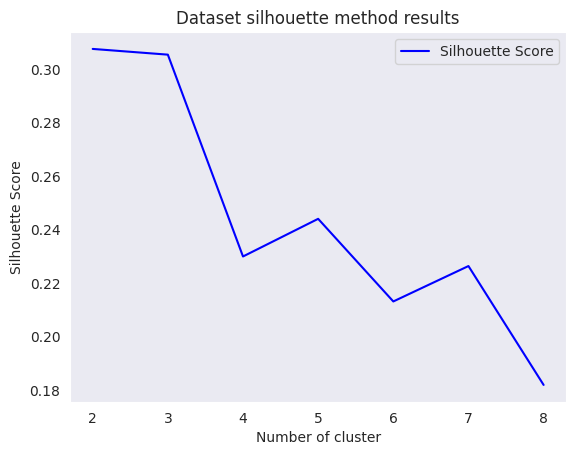

In [ ]:
# Silhoutte method results plotting
plt.figure()
plt.title("Dataset silhouette method results")
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

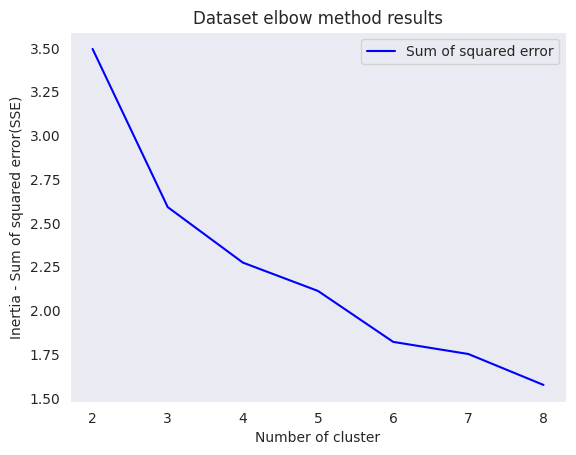

In [ ]:
# Elbow method

# The Elbow Method is a method to determine the optimal value of k (number of centroids)
elb = []
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=1000).fit(x1)    
    elb.append(kmeans.inertia_) # Inertia: Sum of squared error(SSE)

# Elbow method results polotting
plt.figure()
plt.title("Dataset elbow method results")
plt.plot(range_n_clusters, elb,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("Inertia - Sum of squared error(SSE)")
plt.legend()

# When it is not clear which value of K is the best, all candidates should be checked.

In [ ]:
# Considering both methods and the dataset K = 3 and prospectively 5 should be investigate.

In [ ]:
from sklearn.cluster import KMeans

# n_clusters (default as 8): Number of clusters
# init (default as k-means++): Represents method for initialization. 
  ## The default value of k-means++ represents the selection of the initial cluster centers (centroids)
  ## in a smart manner to speed up the convergence. The other values of init can be random, which represents
  ## the selection of n_clusters observations at random from data for the initial centroids.
# n_init (default as 10): Represents the number of time the k-means algorithm will be run independently,
  ## with different random centroids in order to choose the final model as the one with the lowest sum of squared error(SSE).
# max_iter (default as 300): Represents the maximum number of iterations for each run.
# algorithm (default as auto): Represents the type of K-means algorithm to use.
model1 = KMeans(n_clusters=3,n_init='auto',init='k-means++',max_iter=10000, random_state=21, algorithm="lloyd")

fitted_model1 = model1.fit(x1)
labels1 = fitted_model1.labels_
centers1 = pd.DataFrame(fitted_model1.cluster_centers_)

print(f'Cluster centers: \n {centers1}')

Cluster centers: 
           0         1         2         3         4         5
0  0.518249  0.254216  0.163153  0.093781  0.043911  0.783463
1  0.640737  0.305617  0.241811  0.150436  0.060489  0.625416
2  0.383560  0.119563  0.144178  0.098009  0.037632  0.888649


In [ ]:
# For scatters function
x_clustered1 = x.assign(Cluster=labels1)

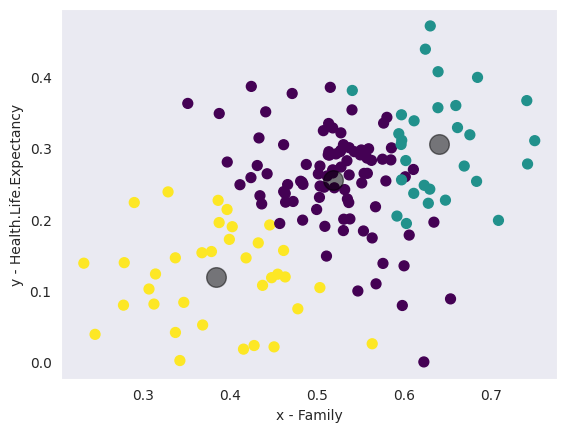

In [ ]:
#@title K-means 1 - Visualization

from mpl_toolkits.mplot3d import Axes3D


# Visualising the clusters with the centers using the rescaled data
plt.scatter(x1['Family'], x1['Health.Life.Expectancy'], c=labels1, s=50, cmap='viridis')
plt.scatter(centers1.iloc[:, 0].values, centers1.iloc[:, 1].values, c='black', s=200, alpha=0.5);
plt.xlabel("x - Family")
plt.ylabel("y - Health.Life.Expectancy")
plt.show()

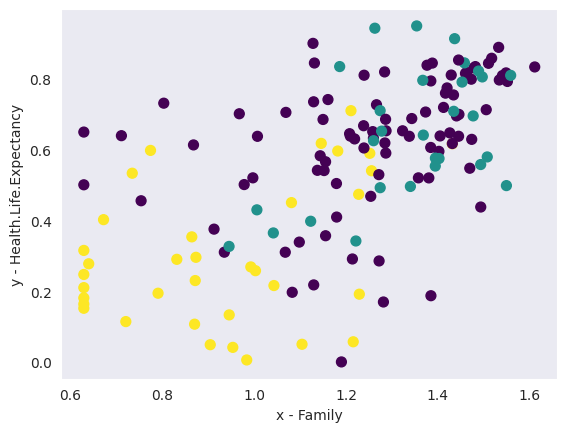

In [ ]:
# Visualising the clusters using the original data
plt.scatter(x_clustered1['Family'], x_clustered1['Health.Life.Expectancy'], c=labels1, s=50, cmap='viridis')
plt.xlabel("x - Family")
plt.ylabel("y - Health.Life.Expectancy")
plt.show()

In [ ]:
#@title K-means 1 - Evaluation

# Predicting the closest cluster each sample in X belongs to.
y1_pred = fitted_model1.predict(x1)
y1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2,
       0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2,
       0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2],
      dtype=int32)

In [ ]:
# Internal evaluation metrics

# 1. The silhouette score

# The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm,
  ## but can also be used as a method for determining an optimal value of k.
# It is calculated by taking the mean distance from intra-cluster and nearest cluster samples.
# Its value ranges from -1 to 1.
# A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
# 1 is the ideal value and indicates that clusters are very dense and nicely separated.
# A negative value indicates elements have likely been assigned to the wrong clusters.


from sklearn.metrics import silhouette_score
s_score1 = silhouette_score(x1,y1_pred)
s_score1

0.3059006057020645

In [ ]:
# 2. Calinski Harabaz Index

# It is also known as the Variance Ratio Criterion.
# Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
# The higher the index the more separable the clusters.

from sklearn.metrics import calinski_harabasz_score
ch_score1 = calinski_harabasz_score(x1,y1_pred)
ch_score1

89.46760610964205

In [ ]:
# 3. The Davies Bouldin index

# The Davies Bouldin index is defined as the average similarity measure of each cluster
  ## with its most similar cluster, where similarity is the ratio of within-cluster distances
  ### to between-cluster distances.
# The minimum value of the DB Index is 0, whereas a smaller value (closer to 0)
  ## represents a better model that produces better clusters.

from sklearn.metrics import davies_bouldin_score
db_score1 = davies_bouldin_score(x1,y1_pred)
db_score1


1.0962983040055077

In [ ]:
# Checking the count of data points in each cluster
np.unique(y1_pred, return_counts=True)

(array([0, 1, 2], dtype=int32), array([90, 29, 35]))

In [ ]:
# Considering the means of the variables for each cluster
grouped_cluster1=x_clustered1.groupby(["Cluster"]).mean().round(2)
print(grouped_cluster1)

         Family  Health.Life.Expectancy  Freedom  Generosity  \
Cluster                                                        
0          1.26                    0.62     0.40        0.23   
1          1.34                    0.65     0.50        0.31   
2          0.93                    0.30     0.35        0.23   

         Trust.Government.Corruption  Dystopia.Residual  
Cluster                                                  
0                               0.11               1.92  
1                               0.13               1.32  
2                               0.09               2.17  


In [ ]:
# Considering the means of the variables for each category
grouped_category=df.groupby(["Category"]).mean().round(2)
print(grouped_category)

          Family  Health.Life.Expectancy  Freedom  Generosity  \
Category                                                        
High        1.41                    0.75     0.52        0.29   
Low         0.94                    0.29     0.30        0.24   
Mid         1.20                    0.56     0.39        0.21   

          Trust.Government.Corruption  Dystopia.Residual  
Category                                                  
High                             0.16               2.16  
Low                              0.09               1.58  
Mid                              0.08               1.81  


<ipython-input-55-a95f9aade447>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_category=df.groupby(["Category"]).mean().round(2)


In [ ]:
# According to the mean values of the features, Cluster 2 largely corresponds to the
# category Low, except for Dystopia.Residual.
# The mean values of Cluster 0 somewhat are closest to the mean vlaues of the category Mid.
# The mean values of Cluster 1 are mostly somewhat lower than the mean values of the category High.

In [ ]:
#@title K-means 2

model2 = KMeans(n_clusters=5,n_init='auto',init='k-means++',max_iter=10000, random_state=21, algorithm="lloyd")
fitted_model2 = model2.fit(x2)
labels2 = fitted_model2.labels_
centers2 = pd.DataFrame(fitted_model2.cluster_centers_)
print(f'Cluster centers: \n {centers2}')

# Assigning clusters to original (untransformed) x
x_clustered2=x.assign(Cluster=labels2)

Cluster centers: 
           0         1         2         3         4         5
0  0.441053  0.237322  0.147762  0.071233  0.032413  0.843935
1  0.538967  0.284384  0.171236  0.101782  0.049180  0.758837
2  0.321485  0.098418  0.131788  0.114453  0.041555  0.917541
3  0.523524  0.109057  0.164976  0.101621  0.039725  0.812017
4  0.646508  0.306099  0.245820  0.155559  0.062628  0.616069


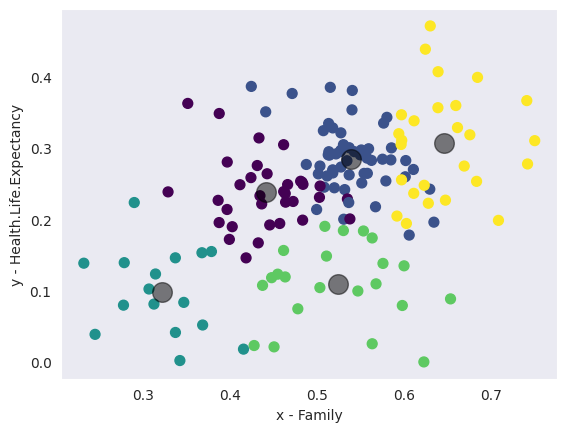

In [ ]:
#@title K-means 2 - Visualization

# Visualising the clusters with the centers using the rescaled data
plt.scatter(x2['Family'], x2['Health.Life.Expectancy'], c=labels2, s=50, cmap='viridis')
plt.scatter(centers2.iloc[:, 0].values, centers2.iloc[:, 1].values, c='black', s=200, alpha=0.5);
plt.xlabel("x - Family")
plt.ylabel("y - Health.Life.Expectancy")
plt.show()

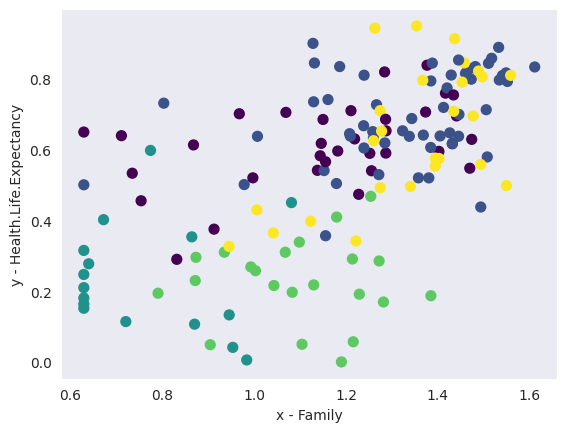

In [ ]:
# Visualising the clusters using the original data
plt.scatter(x_clustered2['Family'], x_clustered2['Health.Life.Expectancy'], c=labels2, s=50, cmap='viridis')
plt.xlabel("x - Family")
plt.ylabel("y - Health.Life.Expectancy")
plt.show()

In [ ]:
#@title K-means 2 - Evaluation

# Predicting the closest cluster each sample in X belongs to.
y2_pred = fitted_model2.predict(x2)
y2_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 4, 1, 1, 4, 4, 0, 1, 0,
       0, 0, 0, 4, 4, 1, 0, 0, 1, 1, 1, 1, 4, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 4, 1, 0, 2, 4, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 4, 0, 1, 1, 4,
       1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 0, 0, 1, 2, 4, 1, 1, 2, 1, 4, 1, 1,
       4, 0, 0, 1, 2, 4, 3, 1, 4, 4, 1, 4, 3, 0, 0, 0, 4, 2, 2, 0, 1, 0,
       3, 3, 2, 4, 3, 3, 1, 1, 2, 4, 1, 0, 3, 0, 0, 3, 3, 3, 4, 3, 3, 4,
       3, 3, 3, 2, 2, 3, 3, 3, 2, 4, 2, 0, 2, 3, 2, 3, 3, 2, 4, 1, 4, 2],
      dtype=int32)

In [ ]:
# Checking the count of data points in each cluster
np.unique(y2_pred, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([34, 56, 16, 22, 26]))

In [ ]:
# Silhouette Score
s_score2 = silhouette_score(x2,y2_pred)
s_score2

0.2463489243012382

In [ ]:
# Calinski Harabaz Index
ch_score2 = calinski_harabasz_score(x2,y2_pred)
ch_score2

69.2577172346096

In [ ]:
# Davies Bouldin index 
db_score2 = davies_bouldin_score(x2,y2_pred)
db_score2

1.184602558267541

In [ ]:
# Considering the means of the variables for each cluster
grouped_cluster2=x_clustered2.groupby(["Cluster"]).mean().round(2)
print(grouped_cluster2)

         Family  Health.Life.Expectancy  Freedom  Generosity  \
Cluster                                                        
0          1.16                    0.61     0.39        0.18   
1          1.33                    0.70     0.43        0.25   
2          0.77                    0.23     0.33        0.27   
3          1.10                    0.23     0.34        0.21   
4          1.34                    0.64     0.51        0.32   

         Trust.Government.Corruption  Dystopia.Residual  
Cluster                                                  
0                               0.08               2.22  
1                               0.12               1.87  
2                               0.10               2.21  
3                               0.08               1.71  
4                               0.13               1.29  


In [ ]:
#@title Comparison of metrics

df_compare = pd.DataFrame([(s_score1, s_score2),
                           (ch_score1, ch_score2),
                           (db_score1, db_score2)],
           columns=('K-means model 1', 'K-means model 2'),
           index=('Silhouette Score', 'Calinski Harabaz Index', 'Davies Bouldin index')
                 )

df_compare.head()

,K-means model 1,K-means model 2
Silhouette Score,0.305901,0.246349
Calinski Harabaz Index,89.467606,69.257717
Davies Bouldin index,1.096298,1.184603


In [ ]:
# The internal metrics are slightly better for model 1, i.e. clusters are slightly better differentiated.
# Therefore, the clusters obtained in the first model are visually investigated using boxplots.

In [ ]:
# Boxplotting the clusters

# Function to make boxplots
def boxplt(x,y,r=45):
    fig, ax = plt.subplots(figsize=(7,4))
    box = sns.boxplot(x=x,y=y, data=x_clustered1)
    box.set_xticklabels(box.get_xticklabels(), rotation=90)
    fig.subplots_adjust(bottom=0.4)
    plt.tight_layout()

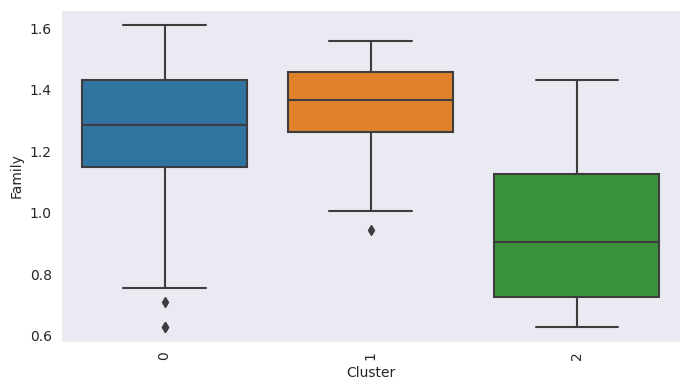

In [ ]:
# Family
boxplt("Cluster","Family")

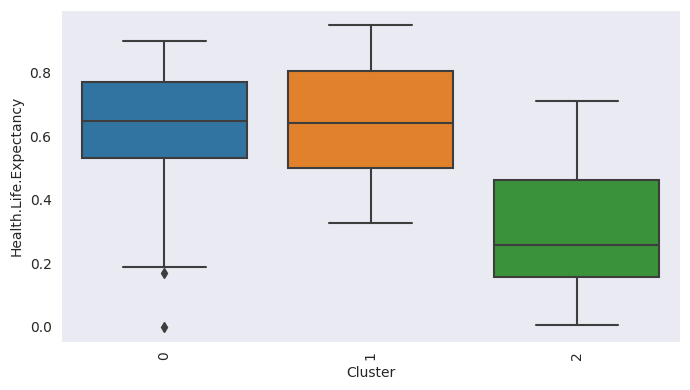

In [ ]:
# Health.Life.Expectancy
boxplt("Cluster","Health.Life.Expectancy")

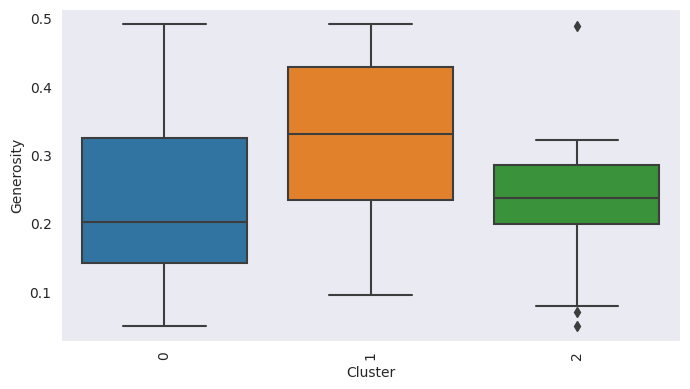

In [ ]:
# Generosity
boxplt("Cluster","Generosity")

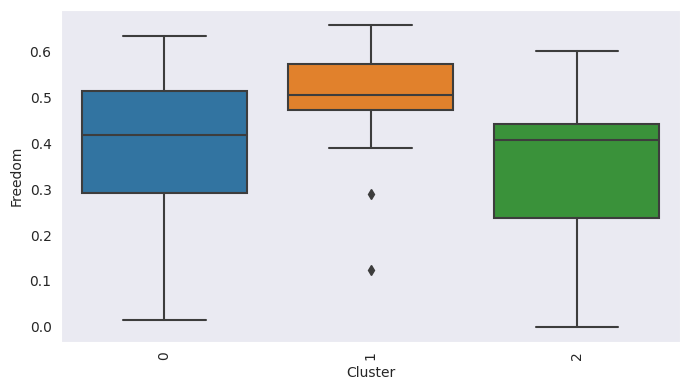

In [ ]:
# Freedom
boxplt("Cluster","Freedom")

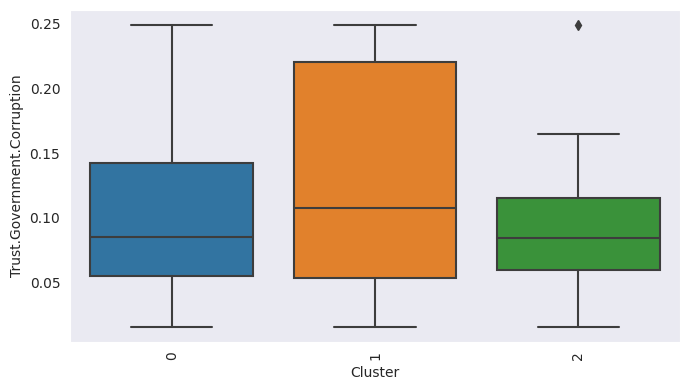

In [ ]:
# Trust.Government.Corruption
boxplt("Cluster","Trust.Government.Corruption")

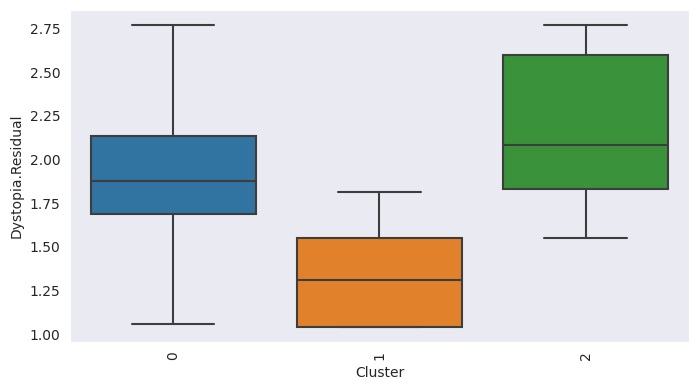

In [ ]:
# Dystopia.Residual 
boxplt("Cluster","Dystopia.Residual")

In [ ]:
# Cluster 0 has a high spread in the number of family members, but a lower mean than
# Cluster 1, and a higher mean than Cluster 2. It is similar situation for health life expectancy.
# For both these variables Cluster 2 is 'lower' that the previous two.

# Cluster 1 is 'higher' in freedom and generosity and 'lower' in dystopia residual.
# Cluster 2 is 'higher' only in dystopia residual.

# It seems like Cluster 2 corresponds to the 'less happy' countries. Cluster 1 corresponds 
# to the 'more happy' countries. On the other hand, Cluster 0 is somewhere in between with 
# a high data spread.